<a href="https://colab.research.google.com/github/nathankim7/colab-notebooks/blob/master/CSC321_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
from sklearn.datasets import load_boston
boston_data = load_boston()
print(boston_data['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [0]:
data = boston_data['data']
x_input = data[:, [2, 5]]
y_target = boston_data['target']

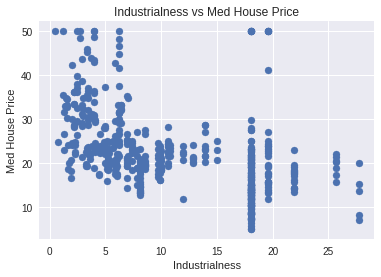

In [0]:
plt.title('Industrialness vs Med House Price')
plt.scatter(x_input[:, 0], y_target)
plt.xlabel('Industrialness')
plt.ylabel('Med House Price')
plt.show()

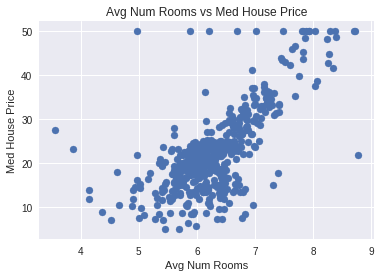

In [0]:
plt.title('Avg Num Rooms vs Med House Price')
plt.scatter(x_input[:, 1], y_target)
plt.xlabel('Avg Num Rooms')
plt.ylabel('Med House Price')
plt.show()

In [0]:
def cost(w, b, X, t):
  N = len(y_target)
  y = np.dot(X, w) + b * np.ones(N)
  return np.sum((y - t) ** 2) / (2.0 * N)

In [0]:
cost(np.array([3, 5]), 20, x_input, y_target)

2241.1239166749015

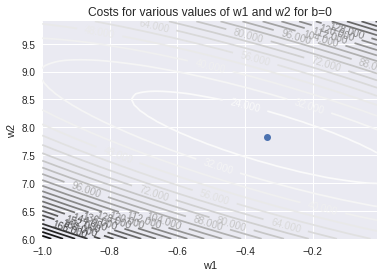

In [0]:
w1s = np.arange(-1.0, 0.0, 0.01)
w2s = np.arange(6.0, 10.0, 0.1)
z_cost = []

for w2 in w2s:
  z_cost.append([cost(np.array([w1, w2]), -22.89831573, x_input, y_target) for w1 in w1s])
  
z_cost = np.array(z_cost)
np.shape(z_cost)
W1, W2 = np.meshgrid(w1s, w2s)
CS = plt.contour(W1, W2, z_cost, 25)
plt.clabel(CS, inline=1, fontsize=10)
plt.title('Costs for various values of w1 and w2 for b=0')
plt.xlabel("w1")
plt.ylabel("w2")
plt.plot([-0.33471389], [7.82205511], 'o') # this will be the minima that we'll find later
plt.show()


In [0]:
x_in = np.concatenate([x_input, np.ones([np.shape(x_input)[0], 1])], axis=1)
x_in

array([[ 2.31 ,  6.575,  1.   ],
       [ 7.07 ,  6.421,  1.   ],
       [ 7.07 ,  7.185,  1.   ],
       ...,
       [11.93 ,  6.976,  1.   ],
       [11.93 ,  6.794,  1.   ],
       [11.93 ,  6.03 ,  1.   ]])

In [0]:
def gradfn(w, X, t):
  N, D = np.shape(X)
  y_pred = np.matmul(X, w)
  error = y_pred - t
  return np.matmul(np.transpose(x_in), error) / float(N)

In [0]:
def solve_grad(X, t, iter = 100000, alpha = 0.005):
  N, D = np.shape(X)
  w = np.zeros([D])
  
  for k in range(iter):
    dw = gradfn(w, X, t)
    w = w - alpha * dw
    
  print(str(w))
  return

In [0]:
solve_grad(x_in, y_target)

[ -0.33706425   7.77893565 -22.59853432]


In [0]:
ret = np.linalg.lstsq(x_in, y_target, -1)
ret[0]

array([ -0.33471389,   7.82205511, -22.89831573])